In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import json
import glob
import random
import collections
from glob import glob
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import seaborn as sns
import shutil
import keras
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import keras
import json
import tensorflow as tf 
from keras.layers import Input
from keras import Sequential
from keras.layers import Dense, LSTM,Flatten, TimeDistributed, Conv2D, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16

In [2]:
from keras.models import load_model
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D,Reshape, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten, UpSampling2D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [3]:
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    tn = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1-y_true) * (y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip((y_true) * (1-y_pred), 0, 1)))
    

    f1_val = tp / ( tp + ( (1/2) * (fp+fn) ) + K.epsilon())
    return f1_val

In [14]:
from glob import glob
trn1='D:/INV/data/invasive-aquatic-species-data/invasive/*/'
trn2='D:/INV/data/invasive-aquatic-species-data/noninvasive/*/'
tr1= glob(trn1)
tr2= glob(trn2)
tr1= shuffle(tr1)
tr2= shuffle(tr2)

tran_index_inv = np.round( len(tr1)* .7 )
tran_index_noninv = np.round( len(tr2)* .7  )
tran_index_noninv

2590.0

In [15]:
data = []
label = []
breath = []
total = 0

for j in tr1[:(int) (tran_index_inv)]:
    label.append(1)
    a = glob(j+'/*')
    breath.append(len(a))
    total = total + len(a)
    
for j in tr2[:(int) (tran_index_noninv)]:
    label.append(0)
    a = glob(j+'/*')
    breath.append(len(a)) 
    total = total + len(a)

for j in range(0,len(tr1[:(int) (tran_index_inv)])):
    a = glob(tr1[j]+'/*')
    for k in range(0,6):
        data.append(a[k])

for j in range(0,len(tr2[:(int) (tran_index_noninv)])):
    a = glob(tr2[j]+'/*')
    for k in range(0,6):
        data.append(a[k])        
        

imgdata=[]
for i in range(len(data)):
    a = Image.open(data[i])
    b = a.resize((28, 28))
    c = np.array(b)
    imgdata.append(c.reshape(28,28,3))
    
from tensorflow.keras.utils import to_categorical
idata = np.array(imgdata)
X_train = idata
X_train = X_train.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train),28,28,3))


In [16]:
end= 0
train_df= []
breath = 6

i = 0
for i in range(0, len(label)):
    deff = []
    for k in range(0, (breath)):
        
        index = (i*6+k)
        
        deff.append(X_train[index])
        
    train_df.append(deff)

Y_train = to_categorical(label)
train_df = np.array(train_df)
YY_Train = label
np.shape(train_df)

(3062, 6, 28, 28, 3)

In [17]:
data = []
label = []
breath = []
total = 0

for j in tr1[(int) (tran_index_inv) + 1 :]:
    label.append(1)
    a = glob(j+'/*')
    breath.append(len(a))
    total = total + len(a)
    
for j in tr2[ (int)(tran_index_noninv) + 1:]:
    label.append(0)
    a = glob(j+'/*')
    breath.append(len(a)) 
    total = total + len(a)

for j in range(0,len(tr1[(int) (tran_index_inv) + 1 :])):
    a = glob(tr1[j]+'/*')
    for k in range(0,6):
        data.append(a[k])

for j in range(0,len(tr2[ (int)(tran_index_noninv) + 1:])):
    a = glob(tr2[j]+'/*')
    for k in range(0,6):
        data.append(a[k])        
        

imgdata=[]
for i in range(len(data)):
    a = Image.open(data[i])
    b = a.resize((28, 28))
    c = np.array(b)
    imgdata.append(c.reshape(28,28,3))
    
from tensorflow.keras.utils import to_categorical
idata = np.array(imgdata)
X_test = idata
X_test = X_test.astype('float32') / 255.
X_test = np.reshape(X_test, (len(X_test),28,28,3))



In [18]:
end= 0
test_df= []
breath = 6

i = 0
for i in range(0, len(label)):
    deff = []
    for k in range(0, (breath)):
        
        index = (i*6+k)
        
        deff.append(X_test[index])
        
    test_df.append(deff)
    
Y_test = to_categorical(label)
test_df = np.array(test_df)
YY_Test = label
np.shape(test_df)

(1310, 6, 28, 28, 3)

In [114]:
np.shape(train_df)

(3499, 6, 28, 28, 3)

In [33]:
DATASET_NAME = "organmnist3d"
BATCH_SIZE = 32
AUTO = tf.data.AUTOTUNE
INPUT_SHAPE = ( 6, 28, 28, 3 )
NUM_CLASSES = 2

# OPTIMIZER
LEARNING_RATE = 1e-4
WEIGHT_DECAY = 1e-5

# TRAINING
EPOCHS = 60

# TUBELET EMBEDDING
PATCH_SIZE = (4, 8, 8)
NUM_PATCHES = (INPUT_SHAPE[0] // PATCH_SIZE[0]) ** 2

# ViViT ARCHITECTURE
LAYER_NORM_EPS = 1e-6
PROJECTION_DIM = 32
NUM_HEADS = 2
NUM_LAYERS = 2

In [34]:
PROJECTION_DIM = 64
NUM_HEADS = 2
NUM_LAYERS = 2

(6123, 2)

In [43]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection =keras.Sequential(
            [
                layers.Dense(projection_dim)
            ]) 
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded 

In [26]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models
from keras_self_attention import SeqSelfAttention

inputs = layers.Input(shape= (6,2352) )

encoded_patches = (PatchEncoder(6, 32 )) (inputs)

for _ in range(2):
    
    x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)

    attention_output = layers.MultiHeadAttention (  num_heads=2, key_dim=32, dropout=0.1 )  (x1, x1)
    
    lstm_output =  LSTM(32,return_sequences=True,dropout=0.1)(x1)

    x2 = layers.Add()([attention_output, encoded_patches,lstm_output])

        # Layer Normalization and MLP
    x3 = layers.LayerNormalization(epsilon=1e-6)(x2)


    x3 = keras.Sequential(layers.Dense(units=32, activation=tf.nn.gelu) )(x3)

        # Skip connection
    encoded_patches = layers.Add()([x3, x2])

    # Layer normalization and Global average pooling.
representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)

representation = layers.GlobalAvgPool1D()(representation)

#representation = LSTM(100,return_sequences=False,dropout=0.1)(representation)

outputs = layers.Dense(units=2, activation="softmax") ( representation)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 6, 2352)]    0                                            
__________________________________________________________________________________________________
patch_encoder_2 (PatchEncoder)  (None, 6, 32)        75488       input_3[0][0]                    
__________________________________________________________________________________________________
layer_normalization_10 (LayerNo (None, 6, 32)        64          patch_encoder_2[0][0]            
__________________________________________________________________________________________________
multi_head_attention_4 (MultiHe (None, 6, 32)        8416        layer_normalization_10[0][0]     
                                                                 layer_normalization_10[0][0

In [27]:
tra_df = train_df.reshape( train_df.shape[0] , train_df.shape[1],( train_df.shape[2] * train_df.shape[3] * 3)  )
tt_df = test_df.reshape(test_df.shape[0] ,test_df.shape[1],( test_df.shape[2] * test_df.shape[3] * 3)  )

In [28]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
model.fit(tra_df,Y_train,validation_split=0.2,batch_size=32,epochs=100)

Epoch 1/100
77/77 [==============================] - 26s 88ms/step - loss: 0.4420 - accuracy: 0.8138 - val_loss: 0.1964 - val_accuracy: 0.9413
Epoch 2/100
77/77 [==============================] - 3s 39ms/step - loss: 0.1924 - accuracy: 0.9249 - val_loss: 0.0976 - val_accuracy: 0.9527
Epoch 3/100
77/77 [==============================] - 3s 40ms/step - loss: 0.1753 - accuracy: 0.9269 - val_loss: 0.0625 - val_accuracy: 0.9674
Epoch 4/100
77/77 [==============================] - 3s 38ms/step - loss: 0.1690 - accuracy: 0.9302 - val_loss: 0.0467 - val_accuracy: 0.9821
Epoch 5/100
77/77 [==============================] - 3s 38ms/step - loss: 0.1641 - accuracy: 0.9290 - val_loss: 0.1929 - val_accuracy: 0.9168
Epoch 6/100
77/77 [==============================] - 3s 38ms/step - loss: 0.1613 - accuracy: 0.9339 - val_loss: 0.1284 - val_accuracy: 0.9413
Epoch 7/100
77/77 [==============================] - 3s 38ms/step - loss: 0.1447 - accuracy: 0.9396 - val_loss: 0.1251 - val_accuracy: 0.9560
Epoch

77/77 [==============================] - 3s 38ms/step - loss: 0.0226 - accuracy: 0.9927 - val_loss: 0.2561 - val_accuracy: 0.9445
Epoch 59/100
77/77 [==============================] - 3s 37ms/step - loss: 0.0316 - accuracy: 0.9882 - val_loss: 0.2209 - val_accuracy: 0.9347
Epoch 60/100
77/77 [==============================] - 3s 37ms/step - loss: 0.0108 - accuracy: 0.9967 - val_loss: 0.1871 - val_accuracy: 0.9641
Epoch 61/100
77/77 [==============================] - 3s 38ms/step - loss: 0.0112 - accuracy: 0.9959 - val_loss: 0.1885 - val_accuracy: 0.9576
Epoch 62/100
77/77 [==============================] - 3s 37ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.2658 - val_accuracy: 0.9462
Epoch 63/100
77/77 [==============================] - 3s 37ms/step - loss: 0.0057 - accuracy: 0.9980 - val_loss: 0.1321 - val_accuracy: 0.9739
Epoch 64/100
77/77 [==============================] - 3s 37ms/step - loss: 0.0373 - accuracy: 0.9898 - val_loss: 0.1078 - val_accuracy: 0.9657
Epoch 65/100

In [29]:
Y_test = Y_test
pred = model.predict(tt_df)
p = np.round(pred)
f1 = get_f1(Y_test, p)
f1

y_p = []
for i in range(len(p)):
    if ( p[i][0] == 0 ):
        y_p.append(1)
    else :
        y_p.append(0)
y_p = np.array(y_p)
y_t = []
for i in range(len(Y_test)):
    if ( Y_test[i][0] == 0 ):
        y_t.append(1)
    else :
        y_t.append(0)
y_t = np.array(y_t)

from sklearn.metrics import confusion_matrix
a=(confusion_matrix(y_t, y_p , labels=[0,1]))
a.T

array([[1109,    0],
       [   0,  201]], dtype=int64)

In [30]:
f = a[1][1]/(((a[0][1]+a[1][0])/2)+a[1][1])
b = 1 - ( (a[1][0]/a[1][1] + a[0][1]/a[0][0])/2  )
r =  (  a[1][1]  / (a[1][1] + a[0][1])  )
print(f,b,r)

1.0 1.0 1.0


In [44]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models
from keras_self_attention import SeqSelfAttention

inputs = layers.Input(shape= (6,2352) )

encoded_patches = (PatchEncoder(6, 32 )) (inputs)

for _ in range(2):
    
    x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)

    attention_output = layers.MultiHeadAttention (  num_heads=2, key_dim=32, dropout=0.1 )  (x1, x1)
    
    #lstm_output =  LSTM(32,return_sequences=True,dropout=0.1)(x1)

    x2 = layers.Add()([attention_output, encoded_patches])

        # Layer Normalization and MLP
    x3 = layers.LayerNormalization(epsilon=1e-6)(x2)


    x3 = keras.Sequential(layers.Dense(units=32, activation=tf.nn.gelu) )(x3)

        # Skip connection
    encoded_patches = layers.Add()([x3, x2])

    # Layer normalization and Global average pooling.
representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)

representation = layers.GlobalAvgPool1D()(representation)

#representation = LSTM(100,return_sequences=False,dropout=0.1)(representation)

outputs = layers.Dense(units=2, activation="softmax") ( representation)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
model.fit(tra_df,Y_train,validation_split=0.2,batch_size=32,epochs=100)

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 6, 2352)]    0                                            
__________________________________________________________________________________________________
patch_encoder_3 (PatchEncoder)  (None, 6, 32)        75488       input_6[0][0]                    
__________________________________________________________________________________________________
layer_normalization_25 (LayerNo (None, 6, 32)        64          patch_encoder_3[0][0]            
__________________________________________________________________________________________________
multi_head_attention_10 (MultiH (None, 6, 32)        8416        layer_normalization_25[0][0]     
                                                                 layer_normalization_25[0][0

77/77 [==============================] - 2s 28ms/step - loss: 0.0729 - accuracy: 0.9710 - val_loss: 0.0679 - val_accuracy: 0.9755
Epoch 28/100
77/77 [==============================] - 2s 28ms/step - loss: 0.0737 - accuracy: 0.9702 - val_loss: 0.1705 - val_accuracy: 0.9478
Epoch 29/100
77/77 [==============================] - 2s 25ms/step - loss: 0.0576 - accuracy: 0.9784 - val_loss: 0.1849 - val_accuracy: 0.9445
Epoch 30/100
77/77 [==============================] - 2s 25ms/step - loss: 0.0729 - accuracy: 0.9702 - val_loss: 0.1034 - val_accuracy: 0.9608
Epoch 31/100
77/77 [==============================] - 2s 25ms/step - loss: 0.0610 - accuracy: 0.9767 - val_loss: 0.0533 - val_accuracy: 0.9837
Epoch 32/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0546 - accuracy: 0.9784 - val_loss: 0.1672 - val_accuracy: 0.9576
Epoch 33/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0552 - accuracy: 0.9759 - val_loss: 0.2031 - val_accuracy: 0.9429
Epoch 34/100

77/77 [==============================] - 2s 25ms/step - loss: 0.0541 - accuracy: 0.9796 - val_loss: 0.2363 - val_accuracy: 0.9413
Epoch 85/100
77/77 [==============================] - 2s 25ms/step - loss: 0.0446 - accuracy: 0.9837 - val_loss: 0.2589 - val_accuracy: 0.9478
Epoch 86/100
77/77 [==============================] - 2s 26ms/step - loss: 0.0171 - accuracy: 0.9943 - val_loss: 0.2900 - val_accuracy: 0.9347
Epoch 87/100
77/77 [==============================] - 2s 25ms/step - loss: 0.0252 - accuracy: 0.9922 - val_loss: 0.2186 - val_accuracy: 0.9511
Epoch 88/100
77/77 [==============================] - 2s 25ms/step - loss: 0.0064 - accuracy: 0.9984 - val_loss: 0.1806 - val_accuracy: 0.9657
Epoch 89/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0040 - accuracy: 0.9992 - val_loss: 0.2190 - val_accuracy: 0.9608
Epoch 90/100
77/77 [==============================] - 2s 25ms/step - loss: 0.0083 - accuracy: 0.9963 - val_loss: 0.2750 - val_accuracy: 0.9527
Epoch 91/100

In [45]:
Y_test = Y_test
pred = model.predict(tt_df)
p = np.round(pred)
f1 = get_f1(Y_test, p)
f1

y_p = []
for i in range(len(p)):
    if ( p[i][0] == 0 ):
        y_p.append(1)
    else :
        y_p.append(0)
y_p = np.array(y_p)
y_t = []
for i in range(len(Y_test)):
    if ( Y_test[i][0] == 0 ):
        y_t.append(1)
    else :
        y_t.append(0)
y_t = np.array(y_t)

from sklearn.metrics import confusion_matrix
a=(confusion_matrix(y_t, y_p , labels=[0,1]))
a.T
f = a[1][1]/(((a[0][1]+a[1][0])/2)+a[1][1])
b = 1 - ( (a[1][0]/a[1][1] + a[0][1]/a[0][0])/2  )
r =  (  a[1][1]  / (a[1][1] + a[0][1])  )
print(f,b,r)

0.995049504950495 0.999096657633243 0.9901477832512315


In [47]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models
from keras_self_attention import SeqSelfAttention

inputs = layers.Input(shape= (6,2352) )

encoded_patches = (PatchEncoder(6, 32 )) (inputs)

for _ in range(2):
    
    x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)

    attention_output =LSTM(32,return_sequences=True,dropout=0.1)(x1)  
    
    #lstm_output =  LSTM(32,return_sequences=True,dropout=0.1)(x1)

    x2 = layers.Add()([attention_output, encoded_patches])

        # Layer Normalization and MLP
    x3 = layers.LayerNormalization(epsilon=1e-6)(x2)


    x3 = keras.Sequential(layers.Dense(units=32, activation=tf.nn.gelu) )(x3)

        # Skip connection
    encoded_patches = layers.Add()([x3, x2])

    # Layer normalization and Global average pooling.
representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)

representation = layers.GlobalAvgPool1D()(representation)

#representation = LSTM(100,return_sequences=False,dropout=0.1)(representation)

outputs = layers.Dense(units=2, activation="softmax") ( representation)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
model.fit(tra_df,Y_train,validation_split=0.2,batch_size=32,epochs=100)

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 6, 2352)]    0                                            
__________________________________________________________________________________________________
patch_encoder_5 (PatchEncoder)  (None, 6, 32)        75488       input_8[0][0]                    
__________________________________________________________________________________________________
layer_normalization_31 (LayerNo (None, 6, 32)        64          patch_encoder_5[0][0]            
__________________________________________________________________________________________________
lstm_7 (LSTM)                   (None, 6, 32)        8320        layer_normalization_31[0][0]     
____________________________________________________________________________________________

77/77 [==============================] - 4s 47ms/step - loss: 0.0987 - accuracy: 0.9600 - val_loss: 0.0354 - val_accuracy: 0.9853
Epoch 29/100
77/77 [==============================] - 3s 44ms/step - loss: 0.1084 - accuracy: 0.9530 - val_loss: 0.2048 - val_accuracy: 0.9184
Epoch 30/100
77/77 [==============================] - 3s 41ms/step - loss: 0.0937 - accuracy: 0.9628 - val_loss: 0.1353 - val_accuracy: 0.9429
Epoch 31/100
77/77 [==============================] - 3s 39ms/step - loss: 0.0859 - accuracy: 0.9620 - val_loss: 0.1486 - val_accuracy: 0.9331
Epoch 32/100
77/77 [==============================] - 3s 44ms/step - loss: 0.0841 - accuracy: 0.9673 - val_loss: 0.0675 - val_accuracy: 0.9739
Epoch 33/100
77/77 [==============================] - 3s 39ms/step - loss: 0.0740 - accuracy: 0.9690 - val_loss: 0.1191 - val_accuracy: 0.9511
Epoch 34/100
77/77 [==============================] - 3s 42ms/step - loss: 0.0805 - accuracy: 0.9682 - val_loss: 0.1474 - val_accuracy: 0.9331
Epoch 35/100

77/77 [==============================] - 3s 38ms/step - loss: 0.0048 - accuracy: 0.9988 - val_loss: 0.0910 - val_accuracy: 0.9739
Epoch 86/100
77/77 [==============================] - 3s 40ms/step - loss: 0.0081 - accuracy: 0.9976 - val_loss: 0.1781 - val_accuracy: 0.9478
Epoch 87/100
77/77 [==============================] - 3s 44ms/step - loss: 0.0141 - accuracy: 0.9939 - val_loss: 0.0838 - val_accuracy: 0.9804
Epoch 88/100
77/77 [==============================] - 3s 41ms/step - loss: 0.0183 - accuracy: 0.9955 - val_loss: 0.1206 - val_accuracy: 0.9690
Epoch 89/100
77/77 [==============================] - 3s 43ms/step - loss: 0.0145 - accuracy: 0.9963 - val_loss: 0.1257 - val_accuracy: 0.9657
Epoch 90/100
77/77 [==============================] - 3s 41ms/step - loss: 0.0068 - accuracy: 0.9980 - val_loss: 0.1035 - val_accuracy: 0.9772
Epoch 91/100
77/77 [==============================] - 3s 45ms/step - loss: 0.0086 - accuracy: 0.9971 - val_loss: 0.1087 - val_accuracy: 0.9755
Epoch 92/100

In [48]:
Y_test = Y_test
pred = model.predict(tt_df)
p = np.round(pred)
f1 = get_f1(Y_test, p)
f1

y_p = []
for i in range(len(p)):
    if ( p[i][0] == 0 ):
        y_p.append(1)
    else :
        y_p.append(0)
y_p = np.array(y_p)
y_t = []
for i in range(len(Y_test)):
    if ( Y_test[i][0] == 0 ):
        y_t.append(1)
    else :
        y_t.append(0)
y_t = np.array(y_t)

from sklearn.metrics import confusion_matrix
a=(confusion_matrix(y_t, y_p , labels=[0,1]))
a.T
f = a[1][1]/(((a[0][1]+a[1][0])/2)+a[1][1])
b = 1 - ( (a[1][0]/a[1][1] + a[0][1]/a[0][0])/2  )
r =  (  a[1][1]  / (a[1][1] + a[0][1])  )
print(f,b,r)

0.9975062344139651 0.9975 1.0


In [19]:
#Patch Encoder with Conv2D ,  LSTM , Pos_Emd

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection =keras.Sequential(
            [
                (layers.Conv2D(2, (3, 3), strides=(1,1),activation='relu')),
                TimeDistributed(MaxPooling2D(2,2)),
                TimeDistributed(Flatten()),
                layers.Dense(projection_dim)
            ]) 
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded 

In [20]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models
from keras_self_attention import SeqSelfAttention

inputs = layers.Input(shape= (6,28,28,3) )

encoded_patches = (PatchEncoder(6, 32 )) (inputs)

for _ in range(2):
    
    x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)

    attention_output = layers.MultiHeadAttention (  num_heads=2, key_dim=32, dropout=0.1 )  (x1, x1)
    
    lstm_output =  LSTM(32,return_sequences=True,dropout=0.1)(x1)

    x2 = layers.Add()([attention_output, encoded_patches,lstm_output])

        # Layer Normalization and MLP
    x3 = layers.LayerNormalization(epsilon=1e-6)(x2)


    x3 = keras.Sequential(layers.Dense(units=32, activation=tf.nn.gelu) )(x3)

        # Skip connection
    encoded_patches = layers.Add()([x3, x2])

    # Layer normalization and Global average pooling.
representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)

representation = layers.GlobalAvgPool1D()(representation)

#representation = LSTM(100,return_sequences=False,dropout=0.1)(representation)

outputs = layers.Dense(units=2, activation="softmax") ( representation)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 6, 28, 28, 3 0                                            
__________________________________________________________________________________________________
patch_encoder_1 (PatchEncoder)  (None, 6, 32)        11096       input_2[0][0]                    
__________________________________________________________________________________________________
layer_normalization_5 (LayerNor (None, 6, 32)        64          patch_encoder_1[0][0]            
__________________________________________________________________________________________________
multi_head_attention_2 (MultiHe (None, 6, 32)        8416        layer_normalization_5[0][0]      
                                                                 layer_normalization_5[0][0]

In [21]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
model.fit(train_df,Y_train,validation_split=0.2,batch_size=32,epochs=100)

Epoch 1/100
77/77 [==============================] - 51s 210ms/step - loss: 0.3287 - accuracy: 0.8583 - val_loss: 0.0711 - val_accuracy: 0.9804
Epoch 2/100
77/77 [==============================] - 8s 100ms/step - loss: 0.2162 - accuracy: 0.9118 - val_loss: 0.2419 - val_accuracy: 0.8711
Epoch 3/100
77/77 [==============================] - 7s 95ms/step - loss: 0.1743 - accuracy: 0.9318 - val_loss: 0.0891 - val_accuracy: 0.9674
Epoch 4/100
77/77 [==============================] - 7s 93ms/step - loss: 0.1629 - accuracy: 0.9326 - val_loss: 0.0384 - val_accuracy: 0.9869
Epoch 5/100
77/77 [==============================] - 8s 98ms/step - loss: 0.1415 - accuracy: 0.9449 - val_loss: 0.0920 - val_accuracy: 0.9641
Epoch 6/100
77/77 [==============================] - 7s 93ms/step - loss: 0.1400 - accuracy: 0.9473 - val_loss: 0.0806 - val_accuracy: 0.9641
Epoch 7/100
77/77 [==============================] - 7s 91ms/step - loss: 0.1264 - accuracy: 0.9486 - val_loss: 0.1229 - val_accuracy: 0.9527
Epo

77/77 [==============================] - 11s 139ms/step - loss: 3.4898e-04 - accuracy: 1.0000 - val_loss: 0.1863 - val_accuracy: 0.9674
Epoch 59/100
77/77 [==============================] - 9s 119ms/step - loss: 0.0145 - accuracy: 0.9943 - val_loss: 0.3640 - val_accuracy: 0.9364
Epoch 60/100
77/77 [==============================] - 9s 122ms/step - loss: 0.0216 - accuracy: 0.9918 - val_loss: 0.1234 - val_accuracy: 0.9739
Epoch 61/100
77/77 [==============================] - 10s 126ms/step - loss: 0.0082 - accuracy: 0.9976 - val_loss: 0.0917 - val_accuracy: 0.9804
Epoch 62/100
77/77 [==============================] - 10s 136ms/step - loss: 0.0221 - accuracy: 0.9918 - val_loss: 0.0419 - val_accuracy: 0.9869
Epoch 63/100
77/77 [==============================] - 9s 119ms/step - loss: 0.0138 - accuracy: 0.9951 - val_loss: 0.1220 - val_accuracy: 0.9739
Epoch 64/100
77/77 [==============================] - 8s 110ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1086 - val_accuracy: 0.977

In [22]:
Y_test = Y_test
pred = model.predict(test_df)
p = np.round(pred)
f1 = get_f1(Y_test, p)
f1

y_p = []
for i in range(len(p)):
    if ( p[i][0] == 0 ):
        y_p.append(1)
    else :
        y_p.append(0)
y_p = np.array(y_p)
y_t = []
for i in range(len(Y_test)):
    if ( Y_test[i][0] == 0 ):
        y_t.append(1)
    else :
        y_t.append(0)
y_t = np.array(y_t)

from sklearn.metrics import confusion_matrix
a=(confusion_matrix(y_t, y_p , labels=[0,1]))
a.T

array([[1109,    0],
       [   0,  201]], dtype=int64)

In [23]:
f = a[1][1]/(((a[0][1]+a[1][0])/2)+a[1][1])
b = 1 - ( (a[1][0]/a[1][1] + a[0][1]/a[0][0])/2  )
r = 1 - (  a[1][1]  / (a[1][1] + a[0][1])  )
print(f,b,r)

1.0 1.0 0.0


0.9514281067975519

In [31]:
X_train, X_val, y_train, y_val = train_test_split( train_df,YY_Train , test_size=0.2, random_state=42)

In [35]:

@tf.function
def preprocess(frames: tf.Tensor, label: tf.Tensor):
    """Preprocess the frames tensors and parse the labels."""
    # Preprocess images
    frames = tf.image.convert_image_dtype(
        frames[
            ..., tf.newaxis
        ],  # The new axis is to help for further processing with Conv3D layers
        tf.float32,
    )
    # Parse label
    label = tf.cast(label, tf.float32)
    return frames, label


def prepare_dataloader(
    videos: np.ndarray,
    labels: np.ndarray,
    loader_type: str = "train",
    batch_size: int = BATCH_SIZE,
):
    """Utility function to prepare the dataloader."""
    dataset = tf.data.Dataset.from_tensor_slices((videos, labels))

    if loader_type == "train":
        dataset = dataset.shuffle(BATCH_SIZE * 2)

    dataloader = (
        dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
        .batch(batch_size)
        .prefetch(tf.data.AUTOTUNE)
    )
    return dataloader


trainloader = prepare_dataloader(X_train , y_train , "train")
validloader = prepare_dataloader(X_val, y_val, "valid")
testloader = prepare_dataloader(test_df,YY_Test, "test")

In [36]:

class TubeletEmbedding(layers.Layer):
    def __init__(self, embed_dim, patch_size, **kwargs):
        super().__init__(**kwargs)
        self.projection = layers.Conv3D(
            filters=embed_dim,
            kernel_size=patch_size,
            strides=patch_size,
            padding="VALID",
        )
        self.flatten = layers.Reshape(target_shape=(-1, embed_dim))

    def call(self, videos):
        projected_patches = self.projection(videos)
        flattened_patches = self.flatten(projected_patches)
        return flattened_patches


In [37]:

class PositionalEncoder(layers.Layer):
    def __init__(self, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim

    def build(self, input_shape):
        _, num_tokens, _ = input_shape
        self.position_embedding = layers.Embedding(
            input_dim=num_tokens, output_dim=self.embed_dim
        )
        self.positions = tf.range(start=0, limit=num_tokens, delta=1)

    def call(self, encoded_tokens):
        # Encode the positions and add it to the encoded tokens
        encoded_positions = self.position_embedding(self.positions)
        encoded_tokens = encoded_tokens + encoded_positions
        return encoded_tokens


In [38]:
PROJECTION_DIM = 32
def create_vivit_classifier(
    tubelet_embedder,
    positional_encoder,
    input_shape=INPUT_SHAPE,
    transformer_layers=NUM_LAYERS,
    num_heads=NUM_HEADS,
    embed_dim=PROJECTION_DIM,
    layer_norm_eps=LAYER_NORM_EPS,
    num_classes=NUM_CLASSES,
):
    # Get the input layer
    inputs = layers.Input(shape=input_shape)
    # Create patches.
    patches = tubelet_embedder(inputs)
    # Encode patches.
    encoded_patches = positional_encoder(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization and MHSA
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim // num_heads, dropout=0.1
        )(x1, x1)

        # Skip connection
        x2 = layers.Add()([attention_output, encoded_patches])

        # Layer Normalization and MLP
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = keras.Sequential(
            [
                layers.Dense(units=embed_dim * 4, activation=tf.nn.gelu),
                layers.Dense(units=embed_dim, activation=tf.nn.gelu),
            ]
        )(x3)

        # Skip connection
        encoded_patches = layers.Add()([x3, x2])

    # Layer normalization and Global average pooling.
    representation = layers.LayerNormalization(epsilon=layer_norm_eps)(encoded_patches)
    representation = layers.GlobalAvgPool1D()(representation)

    # Classify outputs.
    outputs = layers.Dense(units=num_classes, activation="softmax")(representation)

    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


In [39]:


# TUBELET EMBEDDING
PATCH_SIZE = (4, 8, 8)
NUM_PATCHES = (INPUT_SHAPE[0] // PATCH_SIZE[0]) ** 2

NUM_HEADS = 2
NUM_LAYERS = 2
# TRAINING
EPOCHS = 100
PROJECTION_DIM = 32

md = create_vivit_classifier(
        tubelet_embedder=TubeletEmbedding(
            embed_dim=PROJECTION_DIM, patch_size=PATCH_SIZE
        ),
        positional_encoder=PositionalEncoder(embed_dim=PROJECTION_DIM),
    )

md.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 6, 28, 28, 3 0                                            
__________________________________________________________________________________________________
tubelet_embedding (TubeletEmbed (None, 9, 32)        24608       input_4[0][0]                    
__________________________________________________________________________________________________
positional_encoder (PositionalE (None, 9, 32)        288         tubelet_embedding[0][0]          
__________________________________________________________________________________________________
layer_normalization_15 (LayerNo (None, 9, 32)        64          positional_encoder[0][0]         
____________________________________________________________________________________________

In [40]:
PROJECTION_DIM = 32
def run_experiment():
    # Initialize model
    model = create_vivit_classifier(
        tubelet_embedder=TubeletEmbedding(
            embed_dim=PROJECTION_DIM, patch_size=PATCH_SIZE
        ),
        positional_encoder=PositionalEncoder(embed_dim=PROJECTION_DIM),
    )

    # Compile the model with the optimizer, loss function
    # and the metrics.
    optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    # Train the model.
    _ = model.fit(trainloader, epochs=EPOCHS, validation_data=validloader)

    _, accuracy, top_5_accuracy = model.evaluate(testloader)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return model


model = run_experiment()

Epoch 1/100
77/77 [==============================] - 20s 78ms/step - loss: 0.3926 - accuracy: 0.8436 - top-5-accuracy: 1.0000 - val_loss: 0.3380 - val_accuracy: 0.8254 - val_top-5-accuracy: 1.0000
Epoch 2/100
77/77 [==============================] - 4s 48ms/step - loss: 0.2927 - accuracy: 0.8693 - top-5-accuracy: 1.0000 - val_loss: 0.3085 - val_accuracy: 0.8418 - val_top-5-accuracy: 1.0000
Epoch 3/100
77/77 [==============================] - 3s 41ms/step - loss: 0.2794 - accuracy: 0.8653 - top-5-accuracy: 1.0000 - val_loss: 0.2698 - val_accuracy: 0.8646 - val_top-5-accuracy: 1.0000
Epoch 4/100
77/77 [==============================] - 3s 41ms/step - loss: 0.2298 - accuracy: 0.8881 - top-5-accuracy: 1.0000 - val_loss: 0.2940 - val_accuracy: 0.8499 - val_top-5-accuracy: 1.0000
Epoch 5/100
77/77 [==============================] - 3s 40ms/step - loss: 0.2393 - accuracy: 0.8877 - top-5-accuracy: 1.0000 - val_loss: 0.2445 - val_accuracy: 0.8760 - val_top-5-accuracy: 1.0000
Epoch 6/100
77/77 [

Epoch 43/100
77/77 [==============================] - 3s 39ms/step - loss: 0.0703 - accuracy: 0.9686 - top-5-accuracy: 1.0000 - val_loss: 0.1479 - val_accuracy: 0.9331 - val_top-5-accuracy: 1.0000
Epoch 44/100
77/77 [==============================] - 3s 40ms/step - loss: 0.0779 - accuracy: 0.9702 - top-5-accuracy: 1.0000 - val_loss: 0.1594 - val_accuracy: 0.9445 - val_top-5-accuracy: 1.0000
Epoch 45/100
77/77 [==============================] - 4s 53ms/step - loss: 0.0776 - accuracy: 0.9677 - top-5-accuracy: 1.0000 - val_loss: 0.1538 - val_accuracy: 0.9478 - val_top-5-accuracy: 1.0000
Epoch 46/100
77/77 [==============================] - 4s 57ms/step - loss: 0.0707 - accuracy: 0.9677 - top-5-accuracy: 1.0000 - val_loss: 0.1550 - val_accuracy: 0.9429 - val_top-5-accuracy: 1.0000
Epoch 47/100
77/77 [==============================] - 4s 49ms/step - loss: 0.0759 - accuracy: 0.9690 - top-5-accuracy: 1.0000 - val_loss: 0.1882 - val_accuracy: 0.9429 - val_top-5-accuracy: 1.0000
Epoch 48/100
77

77/77 [==============================] - 3s 45ms/step - loss: 0.0337 - accuracy: 0.9865 - top-5-accuracy: 1.0000 - val_loss: 0.2055 - val_accuracy: 0.9445 - val_top-5-accuracy: 1.0000
Epoch 85/100
77/77 [==============================] - 4s 46ms/step - loss: 0.0243 - accuracy: 0.9906 - top-5-accuracy: 1.0000 - val_loss: 0.2828 - val_accuracy: 0.9315 - val_top-5-accuracy: 1.0000
Epoch 86/100
77/77 [==============================] - 3s 44ms/step - loss: 0.0212 - accuracy: 0.9947 - top-5-accuracy: 1.0000 - val_loss: 0.2850 - val_accuracy: 0.9282 - val_top-5-accuracy: 1.0000
Epoch 87/100
77/77 [==============================] - 3s 44ms/step - loss: 0.0521 - accuracy: 0.9808 - top-5-accuracy: 1.0000 - val_loss: 0.2428 - val_accuracy: 0.9364 - val_top-5-accuracy: 1.0000
Epoch 88/100
77/77 [==============================] - 4s 56ms/step - loss: 0.0250 - accuracy: 0.9939 - top-5-accuracy: 1.0000 - val_loss: 0.2397 - val_accuracy: 0.9462 - val_top-5-accuracy: 1.0000
Epoch 89/100
77/77 [========

In [41]:
YY_Test = YY_Test
pred = model.predict(test_df)
p = np.round(pred)

y_p = []
for i in range(len(p)):
    if ( p[i][0] == 0 ):
        y_p.append(1)
    else :
        y_p.append(0)
y_p = np.array(y_p)
y_t = YY_Test

from sklearn.metrics import confusion_matrix
a=(confusion_matrix(y_t, y_p , labels=[0,1]))
a.T

array([[1104,   22],
       [   5,  179]], dtype=int64)

In [42]:
f = a[1][1]/(((a[0][1]+a[1][0])/2)+a[1][1])
b = 1 - ( (a[1][0]/a[1][1] + a[0][1]/a[0][0])/2  )
r =  (  a[1][1]  / (a[1][1] + a[0][1])  )
print(f,b,r)

0.9298701298701298 0.9362829932798964 0.9728260869565217


0.9398567119155354

In [94]:
Y_test[0]

array([0., 1.], dtype=float32)

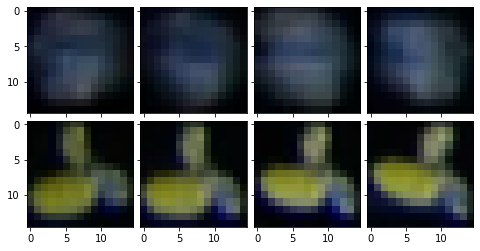

In [59]:
x = train_df[19]
y = train_df[3]
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

im1 = np.arange(100).reshape((10, 10))
im2 = im1.T
im3 = np.flipud(im1)
im4 = np.fliplr(im2)

fig = plt.figure(figsize=(8., 8.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [x[0], x[1], x[2], x[3],y[0], y[1], y[2], y[3]]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()


In [ ]:
#C3D

In [11]:
from keras.layers.convolutional import Conv3D, MaxPooling3D, ZeroPadding3D

In [17]:
model = Sequential()
model.add(Conv3D(64, (3, 3, 3), activation="relu",name="conv1",   input_shape=(6,28,28,3), strides=(1, 1, 1), padding="same"))  
model.add(MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2), name="pool1", padding="valid"))
model.add(Conv3D(128, (3, 3, 3), activation="relu",name="conv2", strides=(1, 1, 1), padding="same"))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), name="pool2", padding="valid"))
model.add(Conv3D(256, (3, 3, 3), activation="relu",name="conv3a", strides=(1, 1, 1), padding="same"))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), name="pool3", padding="valid"))
model.add(Conv3D(512, (3, 3, 3), activation="relu",name="conv4a", strides=(1, 1, 1), padding="same"))   

model.add(Flatten())
                     
    # FC layers group
model.add(Dense(1024, activation='relu', name='fc6'))
model.add(Dropout(.5))
model.add(Dense(2, activation='softmax', name='fc8'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv3D)               (None, 6, 28, 28, 64)     5248      
_________________________________________________________________
pool1 (MaxPooling3D)         (None, 6, 14, 14, 64)     0         
_________________________________________________________________
conv2 (Conv3D)               (None, 6, 14, 14, 128)    221312    
_________________________________________________________________
pool2 (MaxPooling3D)         (None, 3, 7, 7, 128)      0         
_________________________________________________________________
conv3a (Conv3D)              (None, 3, 7, 7, 256)      884992    
_________________________________________________________________
pool3 (MaxPooling3D)         (None, 1, 3, 3, 256)      0         
_________________________________________________________________
conv4a (Conv3D)              (None, 1, 3, 3, 512)     

In [18]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
model.fit(train_df,Y_train,validation_split=0.2,batch_size=32,epochs=100)

Epoch 1/100
77/77 [==============================] - 357s 5s/step - loss: 0.3074 - accuracy: 0.8591 - val_loss: 0.1795 - val_accuracy: 0.9184
Epoch 2/100
77/77 [==============================] - 356s 5s/step - loss: 0.2036 - accuracy: 0.9224 - val_loss: 0.0635 - val_accuracy: 0.9723
Epoch 3/100
77/77 [==============================] - 338s 4s/step - loss: 0.1969 - accuracy: 0.9216 - val_loss: 0.0981 - val_accuracy: 0.9625
Epoch 4/100
77/77 [==============================] - 360s 5s/step - loss: 0.1657 - accuracy: 0.9306 - val_loss: 0.0700 - val_accuracy: 0.9674
Epoch 5/100
77/77 [==============================] - 358s 5s/step - loss: 0.1690 - accuracy: 0.9310 - val_loss: 0.0765 - val_accuracy: 0.9723
Epoch 6/100
65/77 [========================>.....] - ETA: 56s - loss: 0.1179 - accuracy: 0.9495 

KeyboardInterrupt: 

In [ ]:
Y_test = Y_test
pred = model.predict(test_df)
p = np.round(pred)
f1 = get_f1(Y_test, p)
f1

y_p = []
for i in range(len(p)):
    if ( p[i][0] == 0 ):
        y_p.append(1)
    else :
        y_p.append(0)
y_p = np.array(y_p)
y_t = []
for i in range(len(Y_test)):
    if ( Y_test[i][0] == 0 ):
        y_t.append(1)
    else :
        y_t.append(0)
y_t = np.array(y_t)

from sklearn.metrics import confusion_matrix
a=(confusion_matrix(y_t, y_p , labels=[0,1]))
a.T

In [ ]:
f = a[1][1]/(((a[0][1]+a[1][0])/2)+a[1][1])
b = 1 - ( (a[1][0]/a[1][1] + a[0][1]/a[0][0])/2  )
r = 1 - (  a[1][1]  / (a[1][1] + a[0][1])  )
print(f,b,r)